In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
animals_df = pd.read_csv("ANIMALS DATA - final.csv")

## Our variables:

#### Scientific name  - strings

#### Class - 3 classes: ``` Mammalia, Reptalia, Aves.```

#### Order - 60 orders (strings)

#### Family - 252 families (strings)

#### Trend - 3 trends:
```json
    0 - deacrising
    1 - stable
    2 - increasing
```
#### Status - 2 statuses:
```json
    0 - safe animals
    1 - endangered
```
#### Social - 2 options:
```json
    0 - solitary animals
    1 - social animals
```
#### Nocturnal - 2 options:
```json
    0 - day active animals
    1 - nocturnal animals
```
#### Diet - 4 categories:
```json
    0 - all eaters (meats, vegtables, insects ect.)
    1 - carnivores
    2 - vegetarians
    3 - insects eaters
    4 - scavengers
```
#### Mating behavior - 2 categories:
```json
    0 - monogamy animals (dyadic relationship)
    1 - polygamy animals (multiple spouses)
```
#### Continuous variable (averages):
```json
    Life Span (by years)
    Length (by cm)
    Weight (by kg)
    Baby Carrying
    Incubation Period (days) 
    Independent Age (by days)
```
#### Continents columns (binomial columns):
```Africa, Antarctica, Asia, Oceania (includes New-Zeland), Central America, Europe, North America, South America.```

#### Climate zones (binomial columns):
```cold, dry/desert, polar/tundra, temperate, tropical.```

In [3]:
animals_df.set_index('Scientific Name', inplace=True)

In [4]:
animals_df.head(5)

,Class,Order,Family,Trend,Status,Life Span (years),Length (cm),Weight (kg),Is Social,Is Nocturnal,...,Europe,Oceania,South America,Central America,North America,Cold,Dry/Desert,Polar/Tundra,Temperate,Tropical
Scientific Name,,,,,,,,,,,,,,,,,,,,,
Canis lupus arctos,1,8,canidae,1,0,12.0,50.00,51.0000,1,0,...,0,0,0,0,0,0,0,1,0,0
Vulpes lagopus,1,8,canidae,1,0,8.5,53.50,5.0000,0,0,...,1,0,0,0,0,0,0,1,0,0
Tamiasciurus hudsonicus,1,49,sciuridae,1,0,7.5,32.50,0.2395,0,0,...,0,0,0,0,0,1,1,1,1,0
Canis lupus,1,8,canidae,1,0,15.0,132.50,38.0000,1,1,...,1,0,0,0,0,1,1,1,1,0
Mustela erminea,1,8,mustelidae,1,0,6.5,24.75,0.2190,0,1,...,1,1,0,0,0,1,0,1,1,0


In [5]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1548 entries, Canis lupus arctos to Cistothorus palustris
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Class                     1548 non-null   int64  
 1   Order                     1548 non-null   int64  
 2   Family                    1548 non-null   object 
 3   Trend                     1548 non-null   int64  
 4   Status                    1548 non-null   int64  
 5   Life Span (years)         1548 non-null   float64
 6   Length (cm)               1548 non-null   float64
 7   Weight (kg)               1548 non-null   float64
 8   Is Social                 1548 non-null   int64  
 9   Is Nocturnal              1548 non-null   int64  
 10  Diet                      1548 non-null   int64  
 11  Mating Behavior           1548 non-null   int64  
 12  Incubation Period (days)  1548 non-null   float64
 13  Baby Carrying             1548 non

In [6]:
animals_df.describe()

,Class,Order,Trend,Status,Life Span (years),Length (cm),Weight (kg),Is Social,Is Nocturnal,Diet,...,Europe,Oceania,South America,Central America,North America,Cold,Dry/Desert,Polar/Tundra,Temperate,Tropical
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.00000,1548.000000,1548.000000,1548.000000,...,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.818475,28.353359,0.689276,0.275194,19.516205,93.781959,396.66103,0.568475,0.339147,1.111757,...,0.180879,0.195736,0.014212,0.014212,0.014212,0.189922,0.268088,0.106589,0.627261,0.635013
std,0.645201,19.621560,0.665690,0.446756,15.592749,160.012142,4690.14026,0.495449,0.473573,0.925005,...,0.385042,0.396895,0.118402,0.118402,0.118402,0.392366,0.443107,0.308690,0.483690,0.481582
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,10.000000,28.375000,0.30000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,28.000000,1.000000,0.000000,16.000000,54.250000,2.50000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,48.000000,1.000000,1.000000,24.434109,100.000000,12.62500,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,2.000000,59.000000,2.000000,1.000000,162.500000,2750.000000,130000.00000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Categorical variables visualizations and analyzing

## Pie charts (percentage)

Text(0.5, 0.98, 'Trend and Status pie charts')

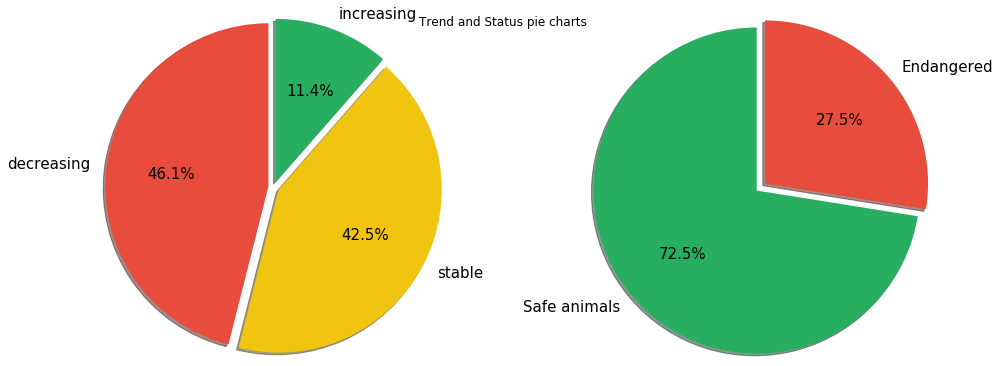

In [7]:
trend_series = animals_df['Trend'].value_counts()
trend_values = trend_series.values.tolist()
trend_index = ['decreasing', 'stable', 'increasing']
trend_colors = ['#E74C3C', '#F1C40F', '#27AE60']

status_series = animals_df['Status'].value_counts()
status_values = status_series.values.tolist()
status_index = ['Safe animals', 'Endangered']
status_colors = ['#27AE60', '#E74C3C']

fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(trend_values, labels=trend_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05, 0.05), radius=1.5, colors=trend_colors, textprops={'fontsize':15})
axs[1].pie(status_values, labels=status_index, autopct='%1.1f%%', shadow=True,
           startangle=90, explode=(0.05, 0.05), radius=1.5, colors=status_colors, textprops={'fontsize':15})

fig.suptitle('Trend and Status pie charts')

Text(0.5, 0.98, 'Social and Nocturnal animals pie charts')

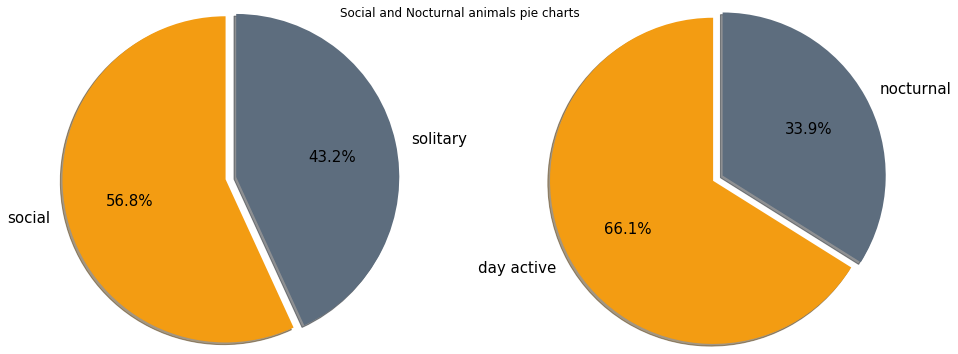

In [8]:
trend_series = animals_df['Is Social'].value_counts()
trend_values = trend_series.values.tolist()
trend_index = ['social', 'solitary']
trend_colors = ['#F39C12', '#5D6D7E']

status_series = animals_df['Is Nocturnal'].value_counts()
status_values = status_series.values.tolist()
status_index = ['day active', 'nocturnal']
status_colors = ['#F39C12', '#5D6D7E']

fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(trend_values, labels=trend_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05), radius=1.5, colors=trend_colors, textprops={'fontsize':15})
axs[1].pie(status_values, labels=status_index, autopct='%1.1f%%', shadow=True,
           startangle=90, explode=(0.05, 0.05), radius=1.5, colors=status_colors, textprops={'fontsize':15})

fig.suptitle('Social and Nocturnal animals pie charts')

Text(0.5, 0.98, 'Diet and Mating Behavior pie charts')

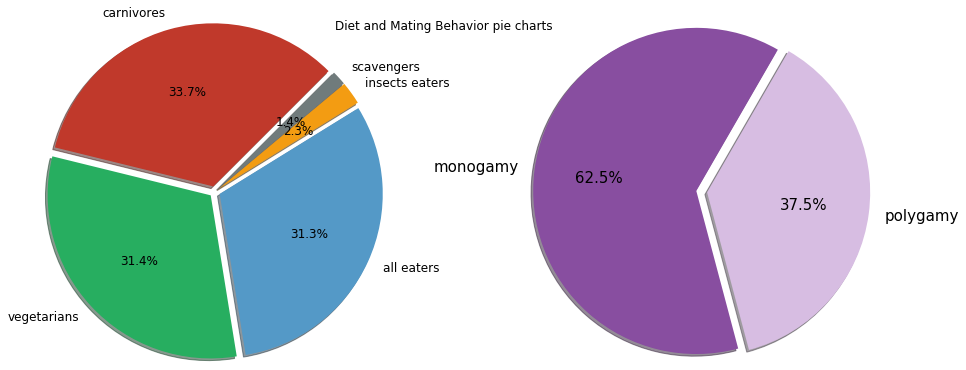

In [110]:
trend_series = animals_df['Diet'].value_counts()
trend_values = trend_series.values.tolist()
trend_index = ['carnivores', 'vegetarians', 'all eaters', 'insects eaters', 'scavengers']
trend_colors = ['#C0392B', '#27AE60', '#5499C7', '#F39C12', '#707B7C']

status_series = animals_df['Mating Behavior'].value_counts()
status_values = status_series.values.tolist()
status_index = ['monogamy', 'polygamy']
status_colors = ['#884EA0', '#D7BDE2']

fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(trend_values, labels=trend_index, autopct='%1.1f%%', shadow=True, startangle=45,
           explode=(0.05, 0.05, 0.05, 0.05, 0.05), radius=1.5, colors=trend_colors, textprops={'fontsize':12})
axs[1].pie(status_values, labels=status_index, autopct='%1.1f%%', shadow=True,
           startangle=60, explode=(0.05, 0.05), radius=1.5, colors=status_colors, textprops={'fontsize':15})

fig.suptitle('Diet and Mating Behavior pie charts')

## Cross tabulation between different categorical feathers:

#### The correlation between the Status (```0 - safe, 1 - endangred```) and Trend (```0 - deacrising, 1 - stable, 2 - increasing```) columns:
###### As we can see, there is a strong relationship between safe animals and stable and increasing trends variables, and a visible bond between endangered animals and deacresing trend (compared with the other trends).

In [11]:
ct_trend_status = pd.crosstab(animals_df['Trend'], animals_df['Status'], normalize='index')
ct_trend_status

Status,0,1
Trend,,
0,0.509119,0.490881
1,0.883590,0.116410
2,0.887006,0.112994


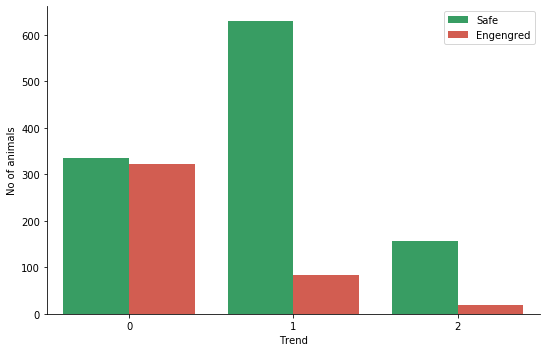

In [116]:
g = sns.catplot(
    x='Trend', 
    data = animals_df,
    kind='count', 
    hue='Status',
    palette=['#27AE60', '#E74C3C'],
    height=5, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Trend', 'No of animals')
g.ax.legend(labels=['Safe','Engengred'])

###### We conduct "Chi-Square Test of Independence", while the second value we get is "p-value". if p-value > 0.05 there is a correlation between both variables.

In [115]:
chi2_contingency(ct_trend_status)

(0.5171104454383247,
 0.7721663887441514,
 2,
 array([[0.75990488, 0.24009512],
        [0.75990488, 0.24009512],
        [0.75990488, 0.24009512]]))

#### The correlation between the Class (```0 - Birds, 1 - Mammals, 2 - Reptiles```) and Trend (```0 - deacrising, 1 - stable, 2 - increasing```) columns:
##### We can see that animals' trend condition are not very good, because most of animals are in deacrising or stable mode. The worst ratio between the deacrising and increasing modes is in the Mammalia class.

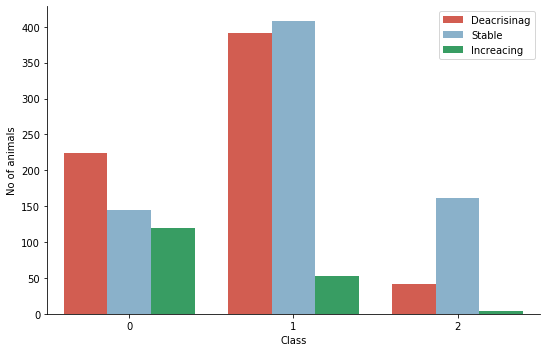

In [122]:
g = sns.catplot(
    x='Class', 
    data = animals_df,
    kind='count', 
    hue='Trend',
    palette=['#E74C3C', '#7FB3D5', '#27AE60'],
    height=5, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Class', 'No of animals')
g.ax.legend(labels=['Deacrisinag','Stable', 'Increacing'])

#### The correlation between the Status (```0 - safe, 1 - endangred```) and Social (```0 - solitary, 1 - social```) columns:
###### As we can see, social animals are more in danger than solitary animals, that could be because they are more "naive" - are not seem to afraid from other species.

In [14]:
ct_status_social = pd.crosstab(animals_df['Status'], animals_df['Is Social'], normalize='index')
ct_status_social

Is Social,0,1
Status,,
0,0.456328,0.543672
1,0.366197,0.633803


Text(0, 0.5, 'Social')

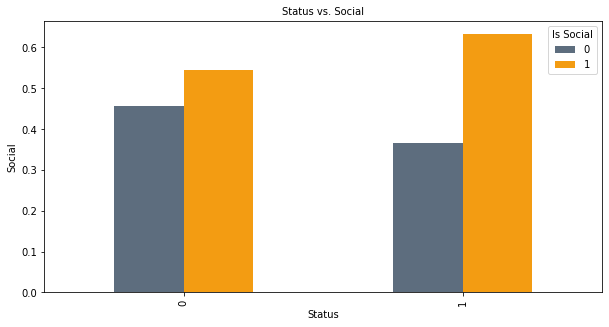

In [118]:
ct_status_social.plot(kind ='bar', figsize=(10,5), color=['#5D6D7E', '#F39C12'])
plt.title('Status vs. Social', fontsize=10)
plt.xlabel('Status')
plt.ylabel('Social')

#### The correlation between the Trend (```0 - deacrising, 1 - stable, 2 - increasing```) and Nocturnal (```0 - diurnal, 1 - nocturnal```) columns:
###### As we can see, the correlation between day active animals and all trends values stronger than between nocturnal animals (maybe it is because of the fact that nocturnal animals are more hidden). The highest correlation is between day active animals and the increasing trend, thats could be because in light period of the day, it is more simple to be aware to the surrounding area and to escape from danger.

In [16]:
ct_trend_nocturnal = pd.crosstab(animals_df['Trend'], animals_df['Is Nocturnal'], normalize='index')
ct_trend_nocturnal

Is Nocturnal,0,1
Trend,,
0,0.674772,0.325228
1,0.603086,0.396914
2,0.841808,0.158192


Text(0, 0.5, 'Nocturnal')

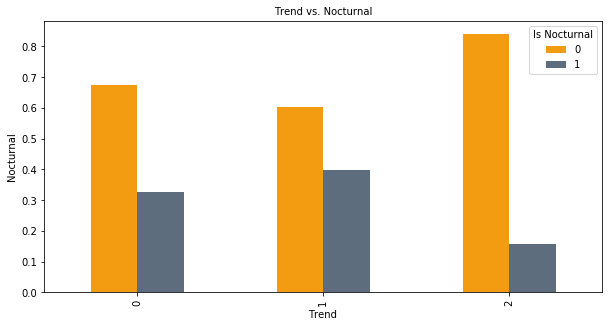

In [119]:
ct_trend_nocturnal.plot(kind ='bar', figsize=(10,5), color=['#F39C12', '#5D6D7E'])
plt.title('Trend vs. Nocturnal', fontsize=10)
plt.xlabel('Trend')
plt.ylabel('Nocturnal')

#### The correlation between the Status (```0 - safe, 1 - endangred```) and Diet (```0 - all eaters, 1 - carnivores, 2 - vegetarians, 3 - insects eaters, 4 - scavengers```) columns:
###### The strongest correlation is between the vegetarians and endangred animals. That could be beacose of the damage to the environment (caused by humans).

In [18]:
ct_status_diet = pd.crosstab(animals_df['Status'], animals_df['Diet'], normalize='index')
ct_status_diet

Diet,0,1,2,3,4
Status,,,,,
0,0.338681,0.336007,0.286096,0.024955,0.014260
1,0.244131,0.255869,0.469484,0.016432,0.014085


Text(0, 0.5, 'Diet')

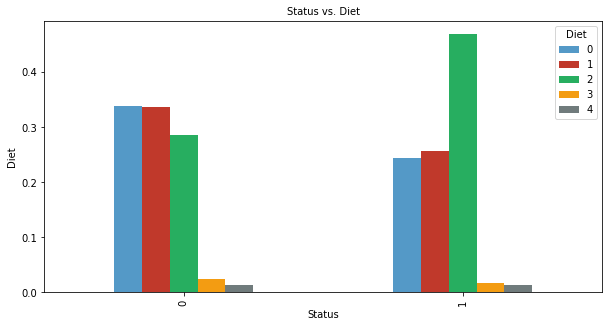

In [120]:
ct_status_diet.plot(kind ='bar', figsize=(10,5), color=['#5499C7', '#C0392B', '#27AE60', '#F39C12', '#707B7C'])
plt.title('Status vs. Diet', fontsize=10)
plt.xlabel('Status')
plt.ylabel('Diet')

#### The correlation between the Status (```0 - safe, 1 - endangered```) and Mating Behavior (```0 - monogamy, 1 - polygamy```) columns:
###### The strongest correlation is between the polygamy and endangered animals. We didnt found a reason for this.

In [20]:
pd.crosstab(animals_df['Status'], animals_df['Mating Behavior'], normalize='index')

Mating Behavior,0,1
Status,,
0,0.405526,0.594474
1,0.295775,0.704225


## Outliers

##### We tried to handle with the "Length" and "weight" outliers, but after the process we figured out that it doesn't make any change, and it caused to lose a lot of data.

In [22]:
# We found 2 animals with mistakes in our source. We had to fix it manually.
animals_df.iloc[8, 7] = 135
animals_df.iloc[638, 7] = 70

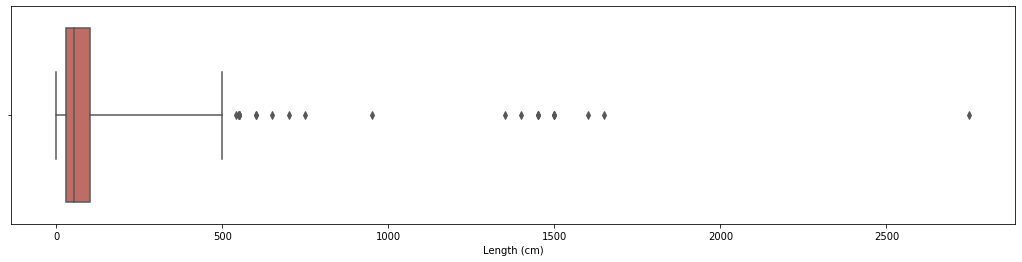

In [23]:
outliers_length = plt.figure(figsize=(18, 4))
sns.boxplot(animals_df['Length (cm)'], whis=6, color="#CD6155")

In [24]:
Q1 = np.percentile(animals_df['Length (cm)'], 25)
Q3 = np.percentile(animals_df['Length (cm)'], 75)
IQR = Q3 - Q1
outliers_length = animals_df[(animals_df['Length (cm)'] < Q1 - 1.5 * IQR) |
                               (animals_df['Length (cm)'] > Q3 + 10 * IQR)].index
len(outliers_length)

12

In [25]:
outliers_df = animals_df.copy()
outliers_df.drop(labels=outliers_length, inplace=True)

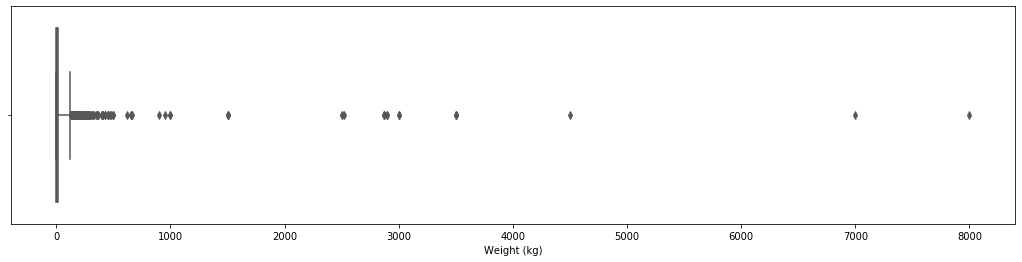

In [26]:
outliers_weight = plt.figure(figsize=(18, 4))
sns.boxplot(outliers_df['Weight (kg)'], whis=10, color="#CD6155")

In [27]:
Q1 = np.percentile(outliers_df['Weight (kg)'], 25)
Q3 = np.percentile(outliers_df['Weight (kg)'], 75)
IQR = Q3 - Q1
outliers_weight = outliers_df[(outliers_df['Weight (kg)'] < Q1 - 1.5 * IQR) |
                               (outliers_df['Weight (kg)'] > Q3 + 256 * IQR)].index
len(outliers_weight)

10

In [28]:
outliers_df.drop(labels=outliers_weight, inplace=True)

In [29]:
outliers_df.shape

(1526, 28)

#### We didn't found a great correlation between those columns:

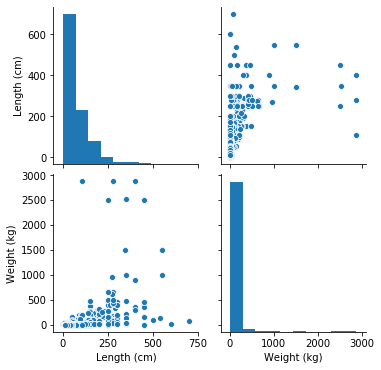

In [30]:
sns.pairplot(outliers_df[['Length (cm)', 'Weight (kg)']])

#### We tried to find the correlation between the rest of our continuos variables:

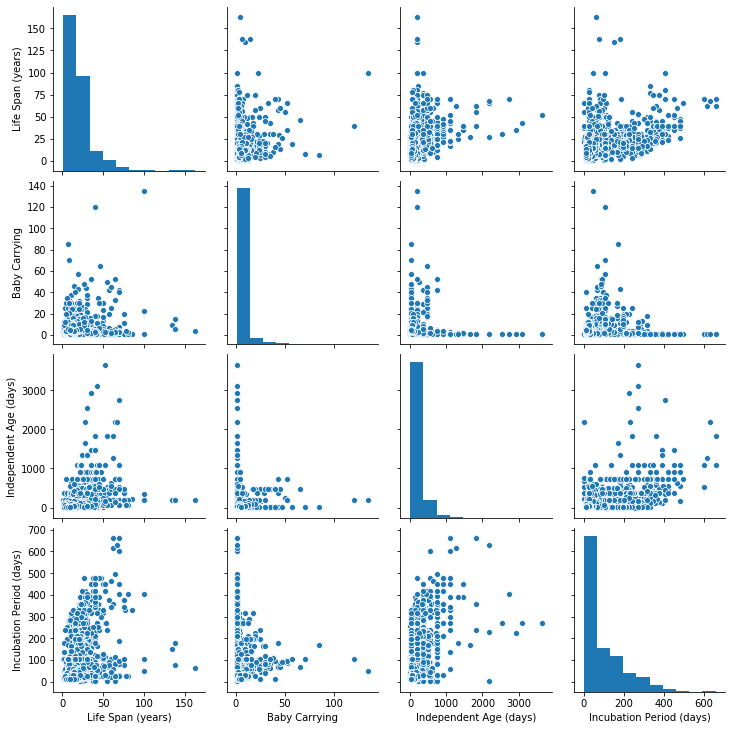

In [111]:
sns.pairplot(animals_df[['Life Span (years)', 'Baby Carrying', 'Independent Age (days)', 'Incubation Period (days)']])

# Bar Plots

## Focus on specific Orders

#### We checked the Trend in relation to Orders. We extracted the most badly-affected populations into new dataframe.

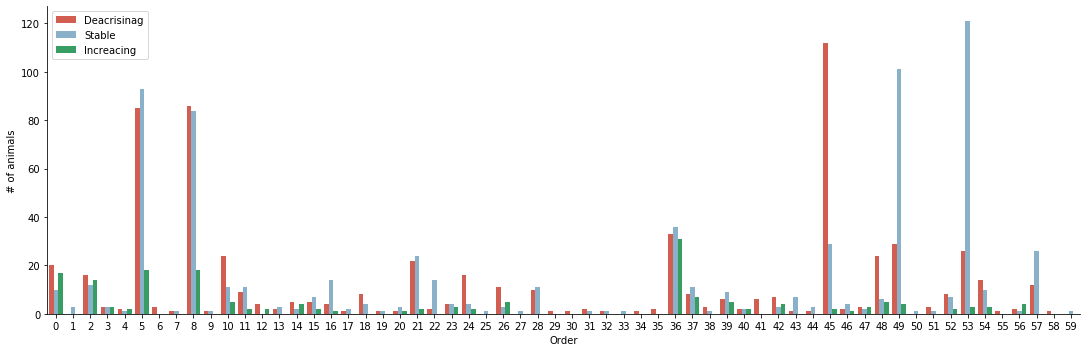

In [35]:
g = sns.catplot(
    x='Order', 
    data = animals_df,
    kind='count', 
    hue='Trend',
    palette=['#E74C3C', '#7FB3D5', '#27AE60'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', '# of animals')
g.ax.legend(labels=['Deacrisinag','Stable', 'Increacing'])

# 5* - ARTIODACTYLA (deers, pigs, whales), 8* - CARNIVORA (wolves, cats, foxes), 10 - CHARADRIIFORMES (kind of birds),
# 21 - DIPROTODONTIA (Kangaroo, mouses, Koala), 24 - GALLIFORMES (chickens, peafowl),
# 26 - GRUIFORMES (crane birds), 28 - LAGOMORPHA (rabbits), 45* - PRIMATES (monkeys, Lemors),
# 48 - PSITTACIFORMES (parrot), 49 - RODENTIA (Squirrel, Humsters), 53 - SQUAMATA (snakes and Iguana),
# 57 - TESTUDINES (turtles)

##### We created sub data frame which includes the most deacrising animals according their Order.

In [36]:
Trend_Orders_df = animals_df[(animals_df['Order'] == 5) | (animals_df['Order'] == 8) | (animals_df['Order'] == 10) |
                            (animals_df['Order'] == 21) | (animals_df['Order'] == 24) | (animals_df['Order'] == 26) |
                            (animals_df['Order'] == 28) | (animals_df['Order'] == 45) | (animals_df['Order'] == 48) |
                            (animals_df['Order'] == 49) | (animals_df['Order'] == 53) | (animals_df['Order'] == 57)]
Trend_Orders_df

,Class,Order,Family,Trend,Status,Life Span (years),Length (cm),Weight (kg),Is Social,Is Nocturnal,...,Europe,Oceania,South America,Central America,North America,Cold,Dry/Desert,Polar/Tundra,Temperate,Tropical
Scientific Name,,,,,,,,,,,,,,,,,,,,,
Canis lupus arctos,1,8,canidae,1,0,12.000000,50.00,51.0000,1,0,...,0,0,0,0,0,0,0,1,0,0
Vulpes lagopus,1,8,canidae,1,0,8.500000,53.50,5.0000,0,0,...,1,0,0,0,0,0,0,1,0,0
Tamiasciurus hudsonicus,1,49,sciuridae,1,0,7.500000,32.50,0.2395,0,0,...,0,0,0,0,0,1,1,1,1,0
Canis lupus,1,8,canidae,1,0,15.000000,132.50,38.0000,1,1,...,1,0,0,0,0,1,1,1,1,0
Mustela erminea,1,8,mustelidae,1,0,6.500000,24.75,0.2190,0,1,...,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gallinago media,0,10,scolopacidae,0,0,16.891892,28.00,0.2000,1,1,...,1,0,0,0,0,0,0,1,1,1
Haematopus palliatus,0,10,haematopodidae,1,0,13.500000,47.00,0.5500,1,0,...,0,0,0,0,0,0,0,0,1,1
Arenaria interpres,0,10,scolopacidae,0,0,14.000000,23.00,0.1175,1,0,...,1,1,0,0,0,0,0,1,1,1


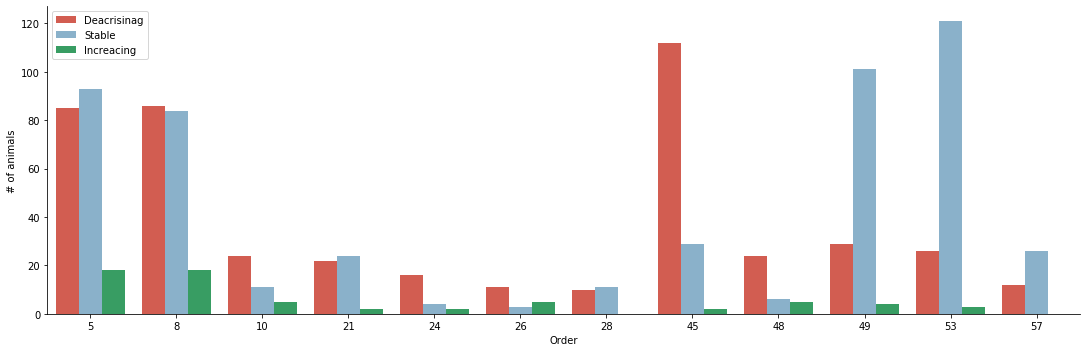

In [37]:
g = sns.catplot(
    x='Order', 
    data = Trend_Orders_df,
    kind='count', 
    hue='Trend',
    palette=['#E74C3C', '#7FB3D5', '#27AE60'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', '# of animals')
g.ax.legend(labels=['Deacrisinag','Stable', 'Increacing'])

#### We checked the Status in relation to Orders. We extracted the most badly-affected populations into new dataframe.

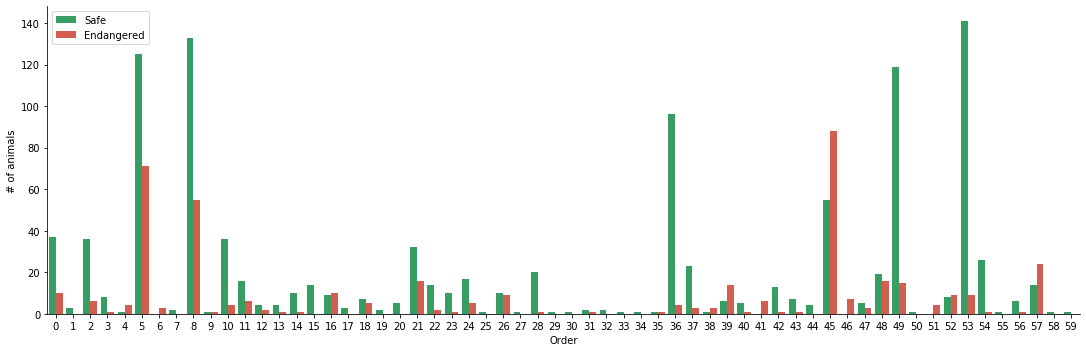

In [44]:
g = sns.catplot(
    x='Order', 
    data = animals_df,
    kind='count', 
    hue='Status',
    palette=['#27AE60', '#E74C3C'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', '# of animals')
g.ax.legend(labels=['Safe','Endangered'])

##### We created sub data frame which includes the most Endangered animals according their Order.

In [45]:
Status_Orders_df = animals_df[(animals_df['Order'] == 5) | (animals_df['Order'] == 8) | (animals_df['Order'] == 21) |
                             (animals_df['Order'] == 45) | (animals_df['Order'] == 48) | (animals_df['Order'] == 49) |
                             (animals_df['Order'] == 57) | (animals_df['Order'] == 41) | (animals_df['Order'] == 46) |
                             (animals_df['Order'] == 51)]
Status_Orders_df

# 5 - ARTIODACTYLA (deers, pigs, whales), 8 - CARNIVORA (wolves, cats, foxes), 21 - DIPROTODONTIA (Kangaroo, mouses, Koala)
# 45* - PRIMATES (monkeys, Lemors), 48 - PSITTACIFORMES (parrot), 49 - RODENTIA (Squirrel, Humsters),
# 57 - TESTUDINES (turtles), 41 - PHOLIDOTA (pangolin), 46 - PROBOSCIDEA (elephant), 51 - SIRENIA (sea cows)

,Class,Order,Family,Trend,Status,Life Span (years),Length (cm),Weight (kg),Is Social,Is Nocturnal,...,Europe,Oceania,South America,Central America,North America,Cold,Dry/Desert,Polar/Tundra,Temperate,Tropical
Scientific Name,,,,,,,,,,,,,,,,,,,,,
Canis lupus arctos,1,8,canidae,1,0,12.0,50.000000,51.0000,1,0,...,0,0,0,0,0,0,0,1,0,0
Vulpes lagopus,1,8,canidae,1,0,8.5,53.500000,5.0000,0,0,...,1,0,0,0,0,0,0,1,0,0
Tamiasciurus hudsonicus,1,49,sciuridae,1,0,7.5,32.500000,0.2395,0,0,...,0,0,0,0,0,1,1,1,1,0
Canis lupus,1,8,canidae,1,0,15.0,132.500000,38.0000,1,1,...,1,0,0,0,0,1,1,1,1,0
Mustela erminea,1,8,mustelidae,1,0,6.5,24.750000,0.2190,0,1,...,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nestor notabilis,0,48,nestoridae,0,1,32.0,48.000000,0.9000,1,0,...,0,1,0,0,0,0,0,0,1,0
Myiopsitta monachus,0,48,psittacidae,2,0,25.0,29.000000,0.1050,1,0,...,0,0,0,0,0,0,0,0,1,1
Pionus menstruus,0,48,psittacidae,0,0,40.0,28.000000,0.2645,1,0,...,0,0,0,0,0,0,0,0,0,1


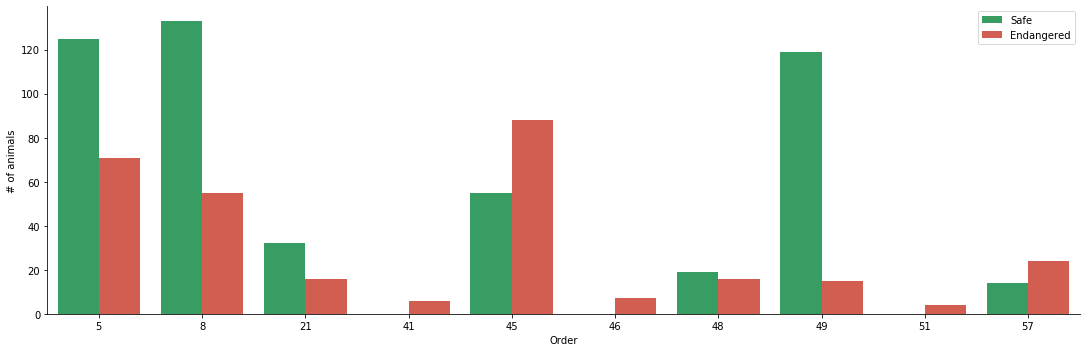

In [46]:
g = sns.catplot(
    x='Order', 
    data = Status_Orders_df,
    kind='count', 
    hue='Status',
    palette=['#27AE60', '#E74C3C'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', '# of animals')
g.ax.legend(labels=['Safe','Endangered'])

### We created another data frame which includes the combination between "deacrising" and "endangered" animals according to their Order.

In [47]:
Specific_Oreders_df = animals_df[(animals_df['Order'] == 5) | (animals_df['Order'] == 8) | (animals_df['Order'] == 10) |
                                 (animals_df['Order'] == 21) | (animals_df['Order'] == 24) | (animals_df['Order'] == 26) |
                                 (animals_df['Order'] == 28) | (animals_df['Order'] == 45) | (animals_df['Order'] == 48) |
                                 (animals_df['Order'] == 49) | (animals_df['Order'] == 53) | (animals_df['Order'] == 57) |
                                 (animals_df['Order'] == 41) | (animals_df['Order'] == 46) | (animals_df['Order'] == 51)]

#### We can see that day active animals are more vulnerable than nocturnal animals according to the affected orders.

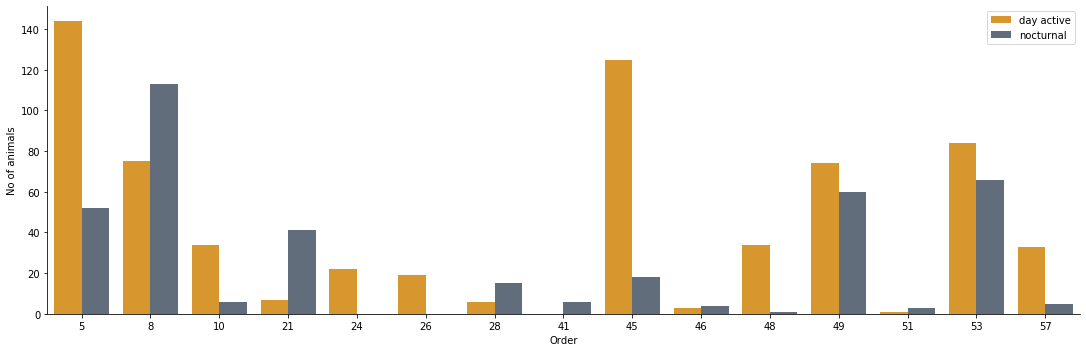

In [123]:
g = sns.catplot(
    x='Order', 
    data = Specific_Oreders_df,
    kind='count', 
    hue='Is Nocturnal',
    palette=['#F39C12', '#5D6D7E'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', 'No of animals')
g.ax.legend(labels=['day active','nocturnal'])

#### We can see that social animals are more vulnerable than nocturnal animals according to the affected orders, except Orders 53 (Snakes and Iguanas that belongs to Reptiles) and 8 (Wolves, Cats and Foxes).

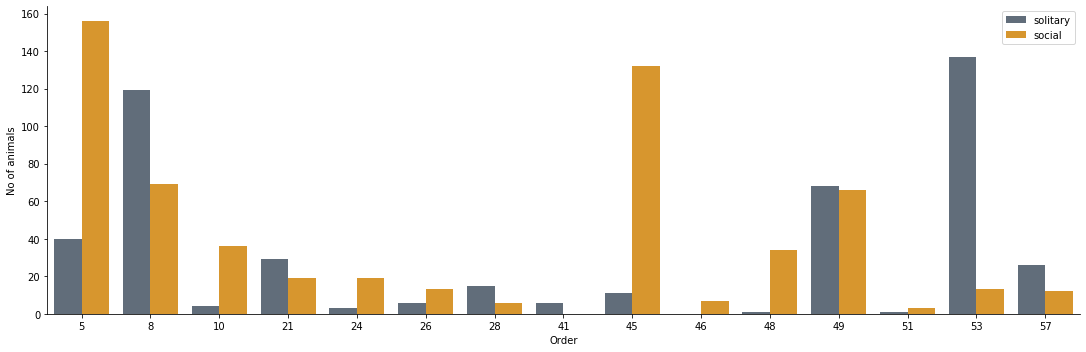

In [124]:
g = sns.catplot(
    x='Order', 
    data = Specific_Oreders_df,
    kind='count', 
    hue='Is Social',
    palette=['#5D6D7E', '#F39C12'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', 'No of animals')
g.ax.legend(labels=['solitary','social'])

#### We can see that vegetarian animals are the most endangered animals.

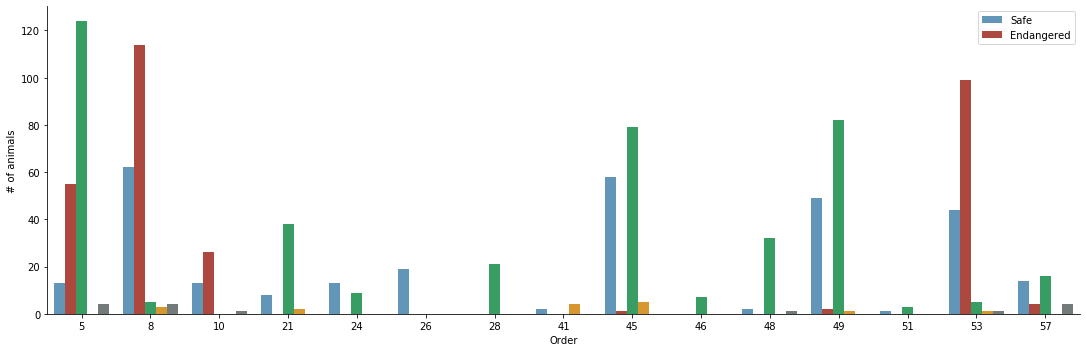

In [51]:
g = sns.catplot(
    x='Order', 
    data = Specific_Oreders_df,
    kind='count', 
    hue='Diet',
    palette=['#5499C7', '#C0392B', '#27AE60', '#F39C12', '#707B7C'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', '# of animals')
g.ax.legend(labels=['Safe','Endangered'])

#### We can see that polygamy animals are the most endangered animals.

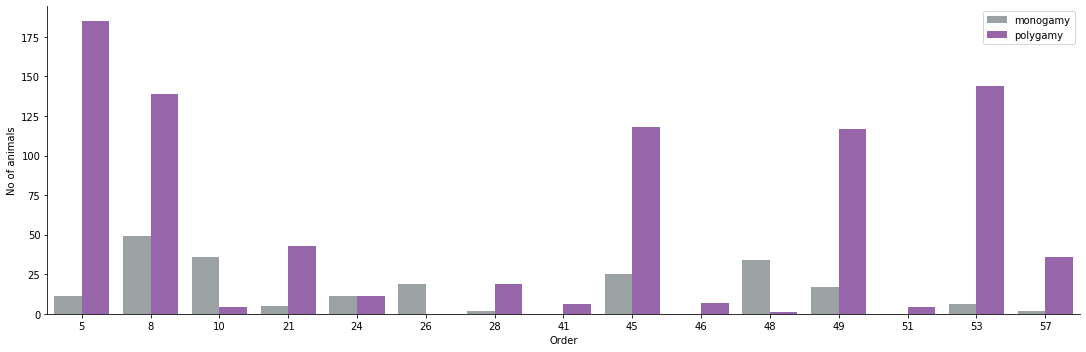

In [125]:
g = sns.catplot(
    x='Order', 
    data = Specific_Oreders_df,
    kind='count', 
    hue='Mating Behavior',
    palette=['#99A3A4', '#9B59B6'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', 'No of animals')
g.ax.legend(labels=['monogamy','polygamy'])

## Line Plots

#### The relationship between the Status variable and the continuos variables: Incubation Period, Independent Age, Life Span, Baby Carrying, Weight, Length.

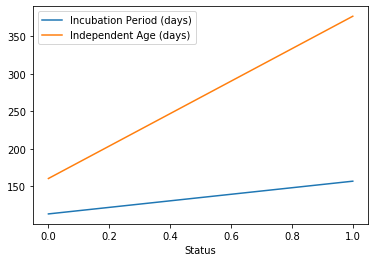

In [53]:
animals_lineplot1 = Specific_Oreders_df.groupby(['Status']).mean()[['Incubation Period (days)', 'Independent Age (days)']]
animals_lineplot1.plot()

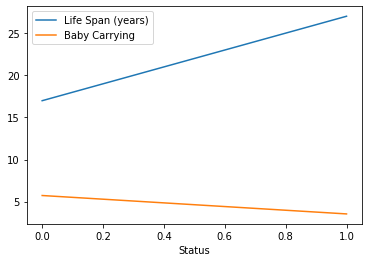

In [54]:
animals_lineplot2 = Specific_Oreders_df.groupby(['Status']).mean()[['Life Span (years)', 'Baby Carrying']]
animals_lineplot2.plot()

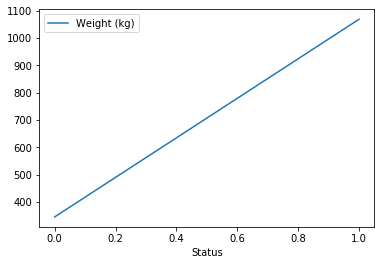

In [55]:
animals_lineplot3 = Specific_Oreders_df.groupby(['Status']).mean()[['Weight (kg)']]
animals_lineplot3.plot()

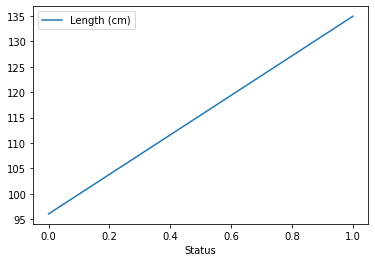

In [56]:
animals_lineplot3 = Specific_Oreders_df.groupby(['Status']).mean()[['Length (cm)']]
animals_lineplot3.plot()

# World map according to Endangered Status

#### We demonstrate the ratio between the endangered and safe animals for each continent.

In [106]:
Africa_df = animals_df[(animals_df['Africa'] == 1)]
Africa_ratio = Africa_df['Status'].value_counts()[1] / Africa_df.shape[0] * 100

Antarctica_df = animals_df[(animals_df['Antarctica'] == 1)]
Antarctica_ratio = Antarctica_df['Status'].value_counts()[1] / Antarctica_df.shape[0]  * 100

Asia_df = animals_df[(animals_df['Asia'] == 1)]
Asia_ratio = Asia_df['Status'].value_counts()[1] / Asia_df.shape[0]  * 100

Europe_df = animals_df[(animals_df['Europe'] == 1)]
Europe_ratio = Europe_df['Status'].value_counts()[1] / Europe_df.shape[0]  * 100

Oceania_df = animals_df[(animals_df['Oceania'] == 1)]
Oceania_ratio = Oceania_df['Status'].value_counts()[1] / Oceania_df.shape[0]  * 100

Americas_df = animals_df[(animals_df['South America'] == 1) | (animals_df['Central America'] == 1) |
                        (animals_df['North America'] == 1)]
Americas_ratio = Americas_df['Status'].value_counts()[1] / Americas_df.shape[0]  * 100


continents_dict = {'continent':['Africa', 'Antarctica', 'Asia', 'Europe', 'Oceania', 'Americas'],
                   'ratio':[Africa_ratio, Antarctica_ratio, Asia_ratio, Europe_ratio, Oceania_ratio, Americas_ratio]}

Continents_df = pd.DataFrame(continents_dict)
Continents_df

,continent,ratio
0,Africa,29.213483
1,Antarctica,26.388889
2,Asia,30.973451
3,Europe,13.571429
4,Oceania,23.432343
5,Americas,36.363636


In [109]:
fig = go.Figure(go.Scattergeo())

gapminder = px.data.gapminder().query("year==2007")
geojson = px.data.election_geojson()

df = pd.merge(gapminder, Continents_df, how='left', on='continent')

fig = px.choropleth(df, locations="iso_alpha",
                    color="ratio", 
                    hover_name="continent",
                    color_continuous_scale = 'Reds')
fig.update_geos(projection_type="natural earth")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()